# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Thu Aug 25 12:07:13 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:3B:00.0 Off |                  N/A |
| 27%   39C    P8     6W / 250W |     11MiB / 11019MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  Off  | 00000000:5E:00.0 Off |                  N/A |
| 27%   41C    P8    24W / 250W |     11MiB / 11019MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


1.12.1+cu102


## 1. What are 3 areas in industry where computer vision is currently being used?

1. Self-driving cars, such as Tesla.
2. Healthcare imaging, such as computer vision to help interpret X-rays.. Google for detecting plyps in the itensstines
3. Security, CV can detect whether someone is invading your hom or not

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

In, ML modeling, overfitting is like a students those memorizing the content before the exam, however when the questions are slightly changes they can not answers them. ... TTherefore, overfitting happens when the model learns the training data very well but fails to generalize on the unseen / test dataset  

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. Reduce the noise in data / cleanup dataset and itnroduce data augmentation techniques : if the model is learning the data very well, it might be just memorizeing the data and the noise. One option would be to remove the noise/clen up the datset ofr if this doesn't, you can introduce artificial noise throught the use of data augmentation to artificially increase the diversity of your training dataset. 
2. Regularization techniques - such as dropout on your neural network - dropout involves randomly removing neurons in different layers so that the remaining neurons hopefully learn more robust weights/patterns representations.
3. Change the model: if the model is too complicated and can fint to a specific problem, learning the data too well because it has to many layers. You could remove some layers to simplify your model. Or you could pick a totally different mdoel altogether, one that may be more suited to your pariticualry problem. or you could also use transfer learning, taking the patterns from one model an applying them to your own problem ... 

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [1]:
import torchvision
from torchvision import datasets

from torchvision import transforms

In [2]:
# Create the path 
from pathlib import Path
rootDir = Path("datasets")
rootDir.mkdir(parents=True,
             exist_ok=True)


## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
# Get the MNIST train dataset
train_data = datasets.MNIST(root=rootDir,
                           train=True,
                           download=True,
                           transform=transforms.ToTensor())# Tronsform the into tensors while downloading ..

# Get the MNIST test dataste
test_data = datasets.MNIST(root=rootDir,
                         train=False,
                         download=True,
                         transform=transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting datasets/MNIST/raw/train-images-idx3-ubyte.gz to datasets/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting datasets/MNIST/raw/train-labels-idx1-ubyte.gz to datasets/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to datasets/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to datasets/MNIST/raw



In [5]:
train_data, test_data, len(train_data), len(test_data)



(Dataset MNIST
     Number of datapoints: 60000
     Root location: datasets
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: datasets
     Split: Test
     StandardTransform
 Transform: ToTensor(),
 60000,
 10000)

In [12]:
# data in tuple form (image, label)
img = train_data[0][0]
label = train_data[0][1]
print(f"Image:\n {img[:1]}, \nLabel: \n {label}")

Image:
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [13]:
# Check out the shapes of our data
print(f"Image shape: {img.shape} -> [color_channels, height, width] (CHW)")
print(f"Label: {label} -> no shape, due to being integer")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width] (CHW)
Label: 5 -> no shape, due to being integer


Note: There are two main agreed upon ways for representing images in machine learning:

Color channels first: [color_channels, height, width] (CHW) -> PyTorch default  
Color channels last: [height, width, color_channels] (HWC) -> Matplotlib/TensorFlow default  

In [14]:
# Get the class names from the dataset 
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [18]:
import matplotlib.pyplot as plt

torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


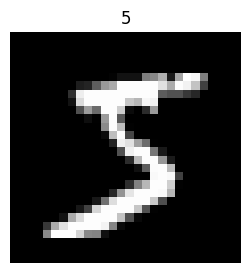

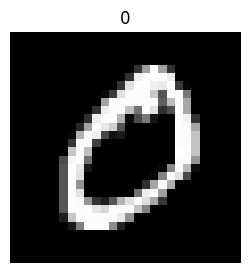

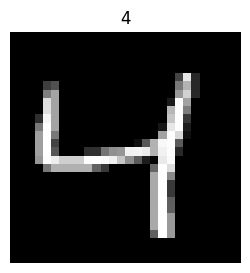

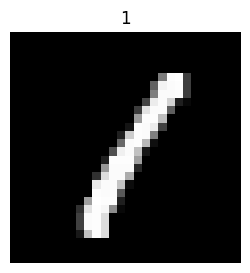

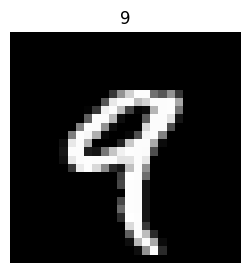

In [20]:
for i in range(5):
    img = train_data[i][0]
    print(img.shape)
    img_squeeze = img.squeeze()
    print(img_squeeze.shape)
    label = train_data[i][1]
    plt.figure(figsize=(3, 3))
    plt.imshow(img_squeeze, cmap="gray")
    plt.title(label)
    plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [23]:
# Create train dataloader
from torch.utils.data import DataLoader
batch_size = 32
train_dataloader = DataLoader(dataset=train_data,
                             batch_size = batch_size,
                             shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                            batch_size=batch_size,
                            shuffle=False)

In [24]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fcd692f7b50>,
 <torch.utils.data.dataloader.DataLoader at 0x7fcd692f7d60>)

In [25]:
for sample in next(iter(train_dataloader)):
    print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [26]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [27]:
traind = 1875 * 32
testd = 313 * 32
traind, testd

(60000, 10016)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [28]:
import torch 
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

In [44]:


class MNIST_model(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7*7,
                     out_features=output_shape)
        
        )
        
    def forward(self, x):
        x = self.conv_block_1(x)
      #  print(f"Output shape of conv block 1: {x.shape}")
        x = self.conv_block_2(x)
     #   print(f"Output shape of conv block 2: {x.shape}")
        x = self.classifier(x)
       # print(f"Output shape of classifier: {x.shape}")
        
        return x
        
        
        

In [45]:
model = MNIST_model (input_shape= 1,
                     hidden_units=10,
                    output_shape=len(class_names)).to(device)
model

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [46]:
# check ou the model state dict to find out what patterns the model wants to learn 
model.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.1403,  0.2456,  0.2955],
                        [-0.2253, -0.1951, -0.3247],
                        [ 0.3180,  0.2815, -0.0593]]],
              
              
                      [[[-0.0787,  0.1774, -0.2071],
                        [ 0.2744, -0.0108, -0.1294],
                        [-0.0451,  0.2801, -0.1380]]],
              
              
                      [[[ 0.0159, -0.3309, -0.0528],
                        [ 0.1561,  0.0937,  0.1261],
                        [-0.1414,  0.0488,  0.0834]]],
              
              
                      [[[ 0.1464,  0.2268,  0.1689],
                        [-0.0242,  0.3158, -0.1847],
                        [ 0.0159, -0.2682,  0.1385]]],
              
              
                      [[[-0.0219,  0.1959,  0.2140],
                        [ 0.0816,  0.2469,  0.1068],
                        [ 0.0803, -0.1070, -0.0408]]],
              
              
      

In [47]:
# try a dummy forward pass to see what happens our data is 
dummy_x = torch.rand(size=([1, 28, 28]))
dummy_x, dummy_x.shape

(tensor([[[5.1344e-01, 3.9822e-01, 3.7464e-02, 7.3198e-02, 2.8110e-01,
           9.3792e-02, 7.4132e-01, 3.8829e-01, 4.7120e-01, 9.0316e-01,
           7.3540e-01, 1.9010e-01, 8.5206e-01, 4.9924e-01, 5.5856e-01,
           2.1542e-01, 6.1075e-01, 4.2329e-02, 2.7761e-01, 7.4485e-01,
           4.7344e-01, 6.3977e-01, 5.9880e-01, 3.2807e-01, 7.9254e-01,
           4.3693e-01, 3.6222e-01, 6.1275e-01],
          [7.7668e-01, 2.6493e-01, 3.4432e-01, 7.2344e-01, 5.8423e-01,
           3.9529e-02, 4.9971e-01, 1.5516e-01, 7.3281e-01, 9.7496e-01,
           2.3423e-01, 7.9602e-01, 5.0895e-01, 1.3347e-03, 6.2870e-02,
           3.7284e-02, 6.8269e-01, 9.4505e-01, 1.4011e-01, 3.7516e-02,
           1.9818e-01, 2.6666e-01, 3.8614e-01, 1.5908e-01, 7.6158e-01,
           3.2271e-01, 5.2149e-01, 7.8665e-01],
          [4.0700e-01, 9.2450e-01, 4.7671e-01, 4.9165e-02, 5.7550e-01,
           5.9195e-01, 9.3966e-01, 2.0645e-01, 8.2440e-03, 9.6268e-01,
           9.6315e-01, 1.8155e-02, 5.9112e-01, 9.889

In [48]:
dummy_x = torch.rand(size=(1, 28, 28)).unsqueeze(dim=0).to(device)
dummy_x.shape, dummy_x

(torch.Size([1, 1, 28, 28]),
 tensor([[[[0.8080, 0.7477, 0.3865, 0.4019, 0.2598, 0.4558, 0.0573, 0.7853,
            0.4712, 0.2816, 0.0115, 0.1498, 0.6222, 0.3235, 0.7793, 0.8585,
            0.6206, 0.8018, 0.3406, 0.2685, 0.6449, 0.4300, 0.7883, 0.0324,
            0.9870, 0.3018, 0.0924, 0.5920],
           [0.4474, 0.5188, 0.0918, 0.5851, 0.6923, 0.3491, 0.6169, 0.5039,
            0.0209, 0.9407, 0.1387, 0.8898, 0.2616, 0.2489, 0.2821, 0.8557,
            0.6738, 0.6543, 0.1726, 0.5197, 0.1990, 0.5026, 0.2953, 0.5209,
            0.1002, 0.3364, 0.0010, 0.4295],
           [0.5024, 0.2369, 0.1680, 0.6623, 0.5743, 0.6495, 0.4614, 0.0700,
            0.9474, 0.4499, 0.3377, 0.4854, 0.3621, 0.7656, 0.1670, 0.5959,
            0.9839, 0.6017, 0.0110, 0.6855, 0.2725, 0.1700, 0.8044, 0.3265,
            0.1884, 0.4208, 0.2596, 0.5228],
           [0.4357, 0.6933, 0.8914, 0.0277, 0.4001, 0.0592, 0.1648, 0.6690,
            0.6698, 0.1204, 0.7345, 0.1967, 0.7933, 0.8536, 0.8585, 0.5722,


In [49]:
dummy_x_unsqueezed = dummy_x.unsqueeze(dim=0)
dummy_x_unsqueezed, dummy_x_unsqueezed.shape

(tensor([[[[[0.8080, 0.7477, 0.3865, 0.4019, 0.2598, 0.4558, 0.0573, 0.7853,
             0.4712, 0.2816, 0.0115, 0.1498, 0.6222, 0.3235, 0.7793, 0.8585,
             0.6206, 0.8018, 0.3406, 0.2685, 0.6449, 0.4300, 0.7883, 0.0324,
             0.9870, 0.3018, 0.0924, 0.5920],
            [0.4474, 0.5188, 0.0918, 0.5851, 0.6923, 0.3491, 0.6169, 0.5039,
             0.0209, 0.9407, 0.1387, 0.8898, 0.2616, 0.2489, 0.2821, 0.8557,
             0.6738, 0.6543, 0.1726, 0.5197, 0.1990, 0.5026, 0.2953, 0.5209,
             0.1002, 0.3364, 0.0010, 0.4295],
            [0.5024, 0.2369, 0.1680, 0.6623, 0.5743, 0.6495, 0.4614, 0.0700,
             0.9474, 0.4499, 0.3377, 0.4854, 0.3621, 0.7656, 0.1670, 0.5959,
             0.9839, 0.6017, 0.0110, 0.6855, 0.2725, 0.1700, 0.8044, 0.3265,
             0.1884, 0.4208, 0.2596, 0.5228],
            [0.4357, 0.6933, 0.8914, 0.0277, 0.4001, 0.0592, 0.1648, 0.6690,
             0.6698, 0.1204, 0.7345, 0.1967, 0.7933, 0.8536, 0.8585, 0.5722,
             0.

In [52]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model(dummy_x)

tensor([[-0.0033,  0.0293, -0.0041,  0.0346,  0.0418, -0.0692,  0.0496,  0.0104,
         -0.0038, -0.0165]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [57]:
dummy_x_2 = torch.rand(size=([1, 10, 7, 7]))
dummy_x_2.shape

torch.Size([1, 10, 7, 7])

In [58]:
flatten_layer =nn.Flatten()
flatten_layer(dummy_x_2), flatten_layer(dummy_x_2).shape

(tensor([[0.1952, 0.0050, 0.3068, 0.1165, 0.9103, 0.6440, 0.7071, 0.6581, 0.4913,
          0.8913, 0.1447, 0.5315, 0.1587, 0.6542, 0.3278, 0.6532, 0.3958, 0.9147,
          0.2036, 0.2018, 0.2018, 0.9497, 0.6666, 0.9811, 0.0874, 0.0041, 0.1088,
          0.1637, 0.7025, 0.6790, 0.9155, 0.2418, 0.1591, 0.7653, 0.2979, 0.8035,
          0.3813, 0.7860, 0.1115, 0.2477, 0.6524, 0.6057, 0.3725, 0.7980, 0.8399,
          0.1374, 0.2331, 0.9578, 0.3313, 0.3227, 0.0162, 0.2137, 0.6249, 0.4340,
          0.1371, 0.5117, 0.1585, 0.0758, 0.2247, 0.0624, 0.1816, 0.9998, 0.5944,
          0.6541, 0.0337, 0.1716, 0.3336, 0.5782, 0.0600, 0.2846, 0.2007, 0.5014,
          0.3139, 0.4654, 0.1612, 0.1568, 0.2083, 0.3289, 0.1054, 0.9192, 0.4008,
          0.9302, 0.6558, 0.0766, 0.8460, 0.3624, 0.3083, 0.0850, 0.0029, 0.6431,
          0.3908, 0.6947, 0.0897, 0.8712, 0.1330, 0.4137, 0.6044, 0.7581, 0.9037,
          0.9555, 0.1035, 0.6258, 0.2849, 0.4452, 0.1258, 0.9554, 0.1330, 0.7672,
          0.6757

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [59]:
%%time
from tqdm.auto import tqdm

#Train on CPU
model_cpu = MNIST_model(input_shape=1,
                       hidden_units=10,
                       output_shape=10).to("cpu")

# create a loss function and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cpu.parameters(),
                           lr=0.1)

### Training loop 
epochs = 5
for epoch in tqdm(range(epochs)):
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_cpu.train()
        
        #Put data on CPU
        X, y = X.to("cpu"), y.to("cpu")
        
        # Forward pass
        y_pred = model_cpu(X)
        
        # Loss calculation 
        loss = loss_fn(y_pred, y)
        train_loss += loss
        
        # Optimizer zero grad
        optimizer.zero_grad()
        
        # Loss backward
        loss.backward()
        
        # Step the optimizer
        optimizer.step()
        
    # Adjust train loss for number of batches 
    train_loss /= len(train_dataloader)
    
    
    
    
    ### Test loop
    test_loss_total = 0
    
    # put the model in eval modde
    model.eval()
    
    # Turn on inference mode 
    with torch.inference_mode():
        for batch, (X_test, y_test) in enumerate(test_dataloader):
            # to device data
            X_test, y_test = X_test.to("cpu"), y_test.to("cpu")
            #Forward pass
            test_pred = model_cpu(X_test)
            #Calculate the loss
            test_loss = loss_fn(test_pred, y_test)
            
            test_loss_total += test_loss
            
        test_loss_total /= len(test_dataloader)
        
    # Print out what's happening
    print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.278 | Test loss: 0.092
Epoch: 1 | Loss: 0.069 | Test loss: 0.053
Epoch: 2 | Loss: 0.055 | Test loss: 0.045
Epoch: 3 | Loss: 0.046 | Test loss: 0.059
Epoch: 4 | Loss: 0.041 | Test loss: 0.042
CPU times: user 31min 42s, sys: 2.32 s, total: 31min 44s
Wall time: 1min 35s


In [60]:
%%time
from tqdm.auto import tqdm 

device = "cuda" if torch.cuda.is_available() else "cpu"

# Train on GPU
model_gpu = MNIST_model(input_shape=1,
                        hidden_units=10,
                        output_shape=10).to(device)

# Create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_gpu.parameters(), lr=0.1)

# Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  model_gpu.train()
  for batch, (X, y) in enumerate(train_dataloader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_pred = model_gpu(X)

    # Loss calculation
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Step the optimizer
    optimizer.step()
  
  # Adjust train loss to number of batches
  train_loss /= len(train_dataloader)

  ### Testing loop
  test_loss_total = 0
  # Put model in eval mode and turn on inference mode
  model_gpu.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      # Make sure test data on target device
      X_test, y_test = X_test.to(device), y_test.to(device)
      
      test_pred = model_gpu(X_test)
      test_loss = loss_fn(test_pred, y_test)

      test_loss_total += test_loss

    # Adjust test loss total for number of batches
    test_loss_total /= len(test_dataloader)
  
  # Print out what's happening
  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.326 | Test loss: 0.104
Epoch: 1 | Loss: 0.086 | Test loss: 0.068
Epoch: 2 | Loss: 0.066 | Test loss: 0.046
Epoch: 3 | Loss: 0.056 | Test loss: 0.057
Epoch: 4 | Loss: 0.050 | Test loss: 0.046
CPU times: user 51.6 s, sys: 380 ms, total: 52 s
Wall time: 49.4 s


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

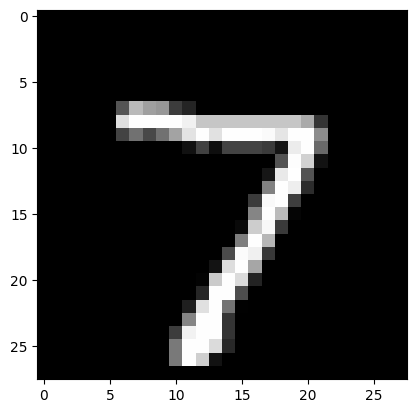

In [61]:
# Make predictions with the trained model
plt.imshow(test_data[0][0].squeeze(), cmap="gray")

In [62]:
# Logits -> Prediction probabilities -> Prediction labels
model_pred_logits = model_gpu(test_data[0][0].unsqueeze(dim=0).to(device)) # make sure image is right shape + on right device
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

tensor([7], device='cuda:0')

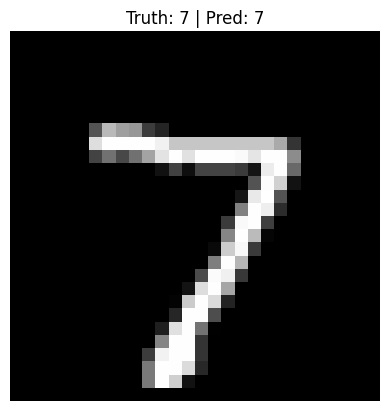

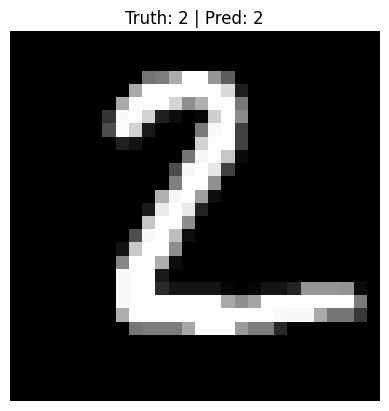

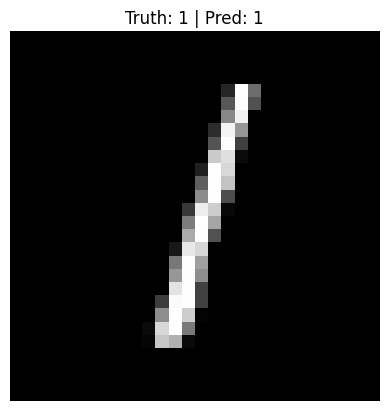

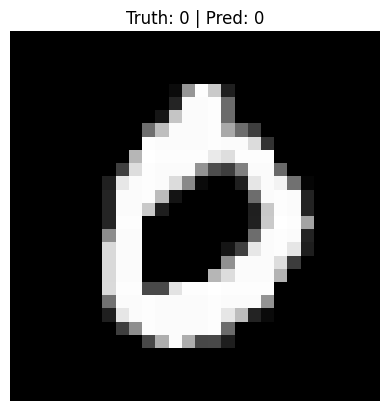

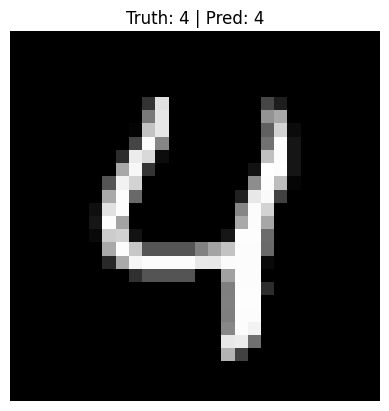

In [63]:
num_to_plot = 5 
for i in range(num_to_plot):
  # Get image and labels from the test data
  img = test_data[i][0]
  label = test_data[i][1]

  # Make prediction on image
  model_pred_logits = model_gpu(img.unsqueeze(dim=0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  # Plot the image and prediction
  plt.figure()
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}") 
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [64]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.20.0


In [65]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.20.0


In [66]:
# Make predictions across all test data
from tqdm.auto import tqdm
model_gpu.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dataloader)):
    # Make sure data on right device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred_logits = model_gpu(X)
    # Logits -> Pred probs -> Pred label
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    # Append the labels to the preds list
    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()
len(y_preds)

0it [00:00, ?it/s]

10000

In [67]:
test_data.targets[:10], y_preds[:10]


(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

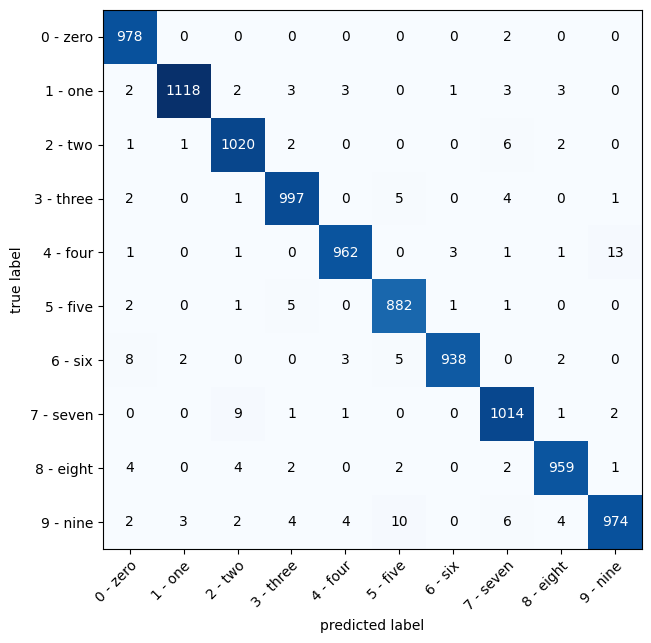

In [68]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix 
confmat = ConfusionMatrix(num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds,
                         target=test_data.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [69]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [70]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=3,
                       stride=2,
                       padding=1)

print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 32, 32])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [73]:
# Download FashionMNIST train & test
from torchvision import datasets
from torchvision import transforms

fashion_mnist_train = datasets.FashionMNIST(root=rootDir,
                                            download=True,
                                            train=True,
                                            transform=transforms.ToTensor())

fashion_mnist_test = datasets.FashionMNIST(root=rootDir,
                                           train=False,
                                           download=True,
                                           transform=transforms.ToTensor())

len(fashion_mnist_train), len(fashion_mnist_test)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting datasets/FashionMNIST/raw/train-images-idx3-ubyte.gz to datasets/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting datasets/FashionMNIST/raw/train-labels-idx1-ubyte.gz to datasets/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting datasets/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to datasets/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting datasets/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to datasets/FashionMNIST/raw



(60000, 10000)

In [78]:
# Turn FashionMNIST datasets into dataloaders
from torch.utils.data import DataLoader

fashion_mnist_train_dataloader = DataLoader(fashion_mnist_train,
                                            batch_size=32,
                                            shuffle=True)

fashion_mnist_test_dataloader = DataLoader(fashion_mnist_test,
                                           batch_size=32,
                                           shuffle=False)

len(fashion_mnist_train_dataloader), len(fashion_mnist_test_dataloader)

(1875, 313)

In [74]:
# Get the class names of the Fashion MNIST dataset
fashion_mnist_class_names = fashion_mnist_train.classes
fashion_mnist_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [75]:
# model_2 is the same architecture as MNIST_model
model_2 = MNIST_model(input_shape=1,
                      hidden_units=10,
                      output_shape=10).to(device)
model_2

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [76]:
# Setup loss and optimizer
from torch import nn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [79]:
# Setup metrics
from tqdm.auto import tqdm
from torchmetrics import Accuracy

acc_fn = Accuracy(num_classes=len(fashion_mnist_class_names)).to(device) 

# Setup training/testing loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss, test_loss_total = 0, 0
  train_acc, test_acc = 0, 0 

  ### Training
  model_2.train()
  for batch, (X_train, y_train) in enumerate(fashion_mnist_train_dataloader):
    X_train, y_train = X_train.to(device), y_train.to(device)

    # Forward pass and loss
    y_pred = model_2(X_train)
    loss = loss_fn(y_pred, y_train)
    train_loss += loss
    train_acc += acc_fn(y_pred, y_train)

    # Backprop and gradient descent
    optimizer.zero_grad()
    loss.backward() 
    optimizer.step()

  # Adjust the loss/acc (find the loss/acc per epoch)
  train_loss /= len(fashion_mnist_train_dataloader)
  train_acc /= len(fashion_mnist_train_dataloader)

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(fashion_mnist_test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)

      # Forward pass and loss
      y_pred_test = model_2(X_test)
      test_loss = loss_fn(y_pred_test, y_test)
      test_loss_total += test_loss

      test_acc += acc_fn(y_pred_test, y_test)
  
    # Adjust the loss/acc (find the loss/acc per epoch)
    test_loss /= len(fashion_mnist_test_dataloader)
    test_acc /= len(fashion_mnist_test_dataloader)
    
  # Print out what's happening
  print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Train acc: {train_acc:.2f} | Test loss: {test_loss_total:.3f} | Test acc: {test_acc:.2f}")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.289 | Train acc: 0.54 | Test loss: 183.932 | Test acc: 0.79
Epoch: 1 | Train loss: 0.504 | Train acc: 0.82 | Test loss: 149.974 | Test acc: 0.83
Epoch: 2 | Train loss: 0.423 | Train acc: 0.85 | Test loss: 135.534 | Test acc: 0.84
Epoch: 3 | Train loss: 0.387 | Train acc: 0.86 | Test loss: 125.762 | Test acc: 0.86
Epoch: 4 | Train loss: 0.364 | Train acc: 0.87 | Test loss: 129.790 | Test acc: 0.84


In [80]:
# Make predictions with trained model_2
test_preds = []
model_2.eval()
with torch.inference_mode():
  for X_test, y_test in tqdm(fashion_mnist_test_dataloader):
    y_logits = model_2(X_test.to(device))
    y_pred_probs = torch.softmax(y_logits, dim=1)
    y_pred_labels = torch.argmax(y_pred_probs, dim=1)
    test_preds.append(y_pred_labels)
test_preds = torch.cat(test_preds).cpu() # matplotlib likes CPU
test_preds[:10], len(test_preds)

  0%|          | 0/313 [00:00<?, ?it/s]

(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), 10000)

In [81]:
# Get wrong prediction indexes
import numpy as np
wrong_pred_indexes = np.where(test_preds != fashion_mnist_test.targets)[0]
len(wrong_pred_indexes)

1564

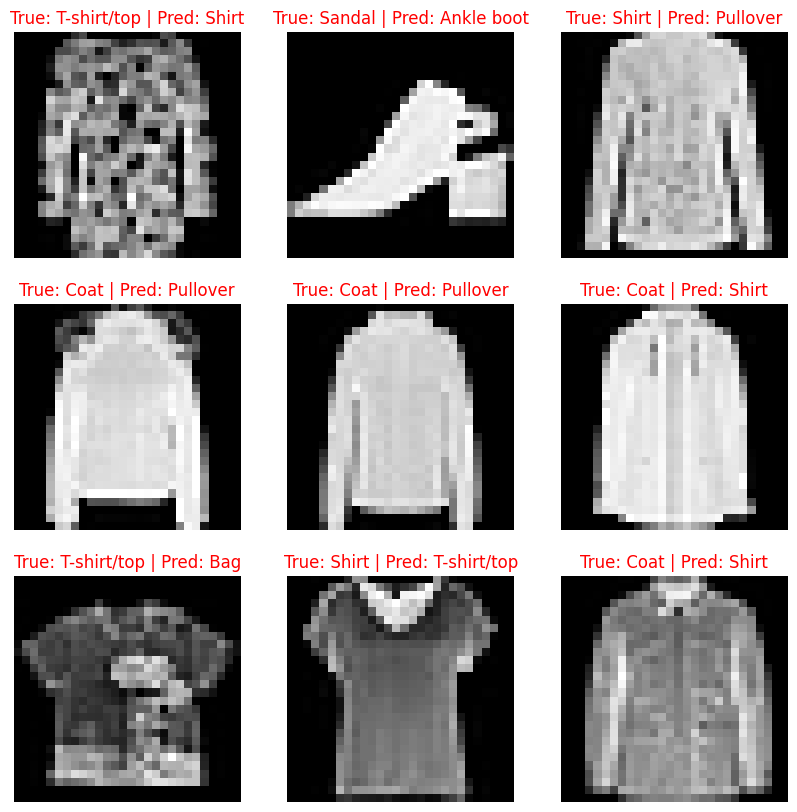

In [82]:
# Select random 9 wrong predictions and plot them
import random
random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_selection):
  # Get true and pred labels
  true_label = fashion_mnist_class_names[fashion_mnist_test[idx][1]]
  pred_label = fashion_mnist_class_names[test_preds[idx]]

  # Plot the wrong prediction with its original label
  plt.subplot(3, 3, i+1)
  plt.imshow(fashion_mnist_test[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False);

As seeing from the above predicitons the classes are overlapped over, as I got confused when looking at Sneekers and Ankle both are confused but 